In [37]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/zalig/cu-datasets/main/advertisment.csv'
df = pd.read_csv(url)

In [38]:
df['BirthdayYear'].sort_values()
df['Age'].sort_values()  # 20 - 68 лет
df['ClientSince'].sort_values() # 2023 - 2024
# выбросов нету
print(df['Gender'].unique())

['Male' 'Female']


In [39]:
# Blue_1
count_of_clients = df.count()
print(count_of_clients)

total_conversion = 1327 / 20000 * 100

count_purchasers_A = len(df[(df['A'] == 1) & (df['Purchased'] == 1)])
A_conversion = count_purchasers_A / 300 * 100

count_purchasers_B = len(df[(df['B'] == 1) & (df['Purchased'] == 1)])
B_conversion = count_purchasers_B / 500 * 100

count_purchasers_without_ad = len(df[(df['A'] != 1) & (df['B'] != 1) & (df['Purchased'] == 1)])
without_ad_conversion = count_purchasers_without_ad / (20000 - 800) * 100

print(f' Сколько купили среди всех: {round(total_conversion, 2)} % \n Кол-во покупателей в группе А: {count_purchasers_A} \n Сколько купили среди группы А: {round(A_conversion, 2)} % \n Кол-во покупателей в группе B: {count_purchasers_B} \n Сколько купили среди группы B: {round(B_conversion, 2)} % \n Кол-во покупателей в группе без рекламы: {count_purchasers_without_ad} \n Сколько купили без рекламы: {round(without_ad_convertion, 2)} %')

BirthdayYear    20000
Age             20000
Gender          20000
ClientSince     20000
A                 300
B                 500
Purchased        1327
dtype: int64
 Сколько купили среди всех: 6.64 % 
 Кол-во покупателей в группе А: 33 
 Сколько купили среди группы А: 11.0 % 
 Кол-во покупателей в группе B: 66 
 Сколько купили среди группы B: 13.2 % 
 Кол-во покупателей в группе без рекламы: 1228 
 Сколько купили без рекламы: 6.4 %


In [40]:
# Blue_2
count_clients_without_ad = 19200
expected_purchases_A = (A_conversion - without_ad_conversion) * count_clients_without_ad / 100
expected_purchases_B = (B_conversion - without_ad_conversion) * count_clients_without_ad / 100
print(f'Сколько доп. покупок при показе А: {expected_purchases_A}\nСколько доп. покупок при показе B: {expected_purchases_B}')

Сколько доп. покупок при показе А: 883.9999999999999
Сколько доп. покупок при показе B: 1306.4


In [41]:
# Red
income_per_person = 3000
income_A = income_per_person * expected_purchases_A
income_B = income_per_person * expected_purchases_B
cost_A = count_clients_without_ad * 80
cost_B = count_clients_without_ad * 80
profit_A = income_A - cost_A
profit_B = income_B - cost_B
print(f'Доход А: {income_A} Расход А: {cost_A} Прибыль {profit_A}')
print(f'Доход B: {income_B} Расход B: {cost_B} Прибыль {profit_B}')
# прибыль от рекламы B больше

Доход А: 2651999.9999999995 Расход А: 1536000 Прибыль 1115999.9999999995
Доход B: 3919200.0000000005 Расход B: 1536000 Прибыль 2383200.0000000005


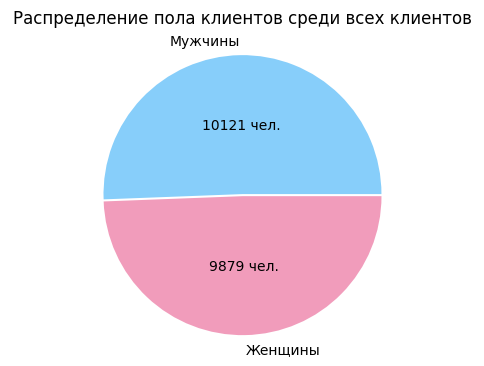

In [42]:
labels = ["Мужчины", "Женщины"]
genders = [len(df[df['Gender'] == 'Male']), len(df[df['Gender'] == 'Female'])]
plt.figure(figsize = (6, 4))
plt.pie(
    genders,
    labels = labels,
    explode = (0.015, 0),
    colors =  ['#87CEFA', '#F19CBB'],
    autopct = lambda x: '{:.0f} чел.'.format(x *  sum(genders) / 100),
    pctdistance = 0.5
)
plt.title('Распределение пола клиентов среди всех клиентов', pad = 13)
plt.axis('equal')  # круг вместо эллипса
plt.show()

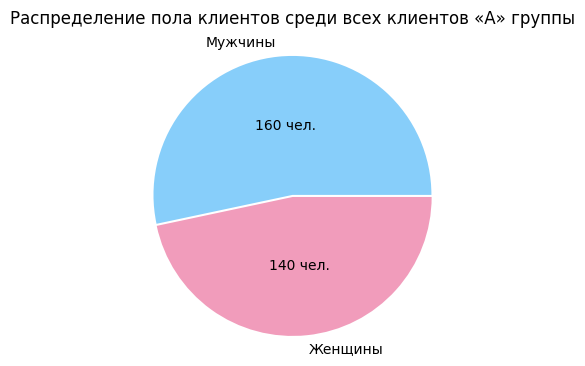

In [43]:
labels = ["Мужчины", "Женщины"]
genders = [(len(df[(df['Gender'] == 'Male') & (df['A'] == 1)])), (len(df[(df['Gender'] == 'Female') & (df['A'] == 1)]))]
plt.figure(figsize = (6, 4))
plt.pie(
    genders,
    labels = labels,
    explode = (0.015, 0),
    colors =  ['#87CEFA', '#F19CBB'],
    autopct = lambda x: '{:.0f} чел.'.format(x * sum(genders) / 100),
    pctdistance = 0.5
)
plt.title('Распределение пола клиентов среди всех клиентов «A» группы', pad = 13)
plt.axis('equal')
plt.show()

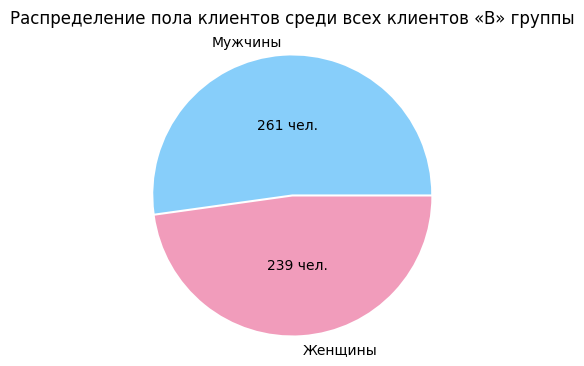

In [44]:
labels = ["Мужчины", "Женщины"]
genders = [(len(df[(df['Gender'] == 'Male') & (df['B'] == 1)])), (len(df[(df['Gender'] == 'Female') & (df['B'] == 1)]))]
plt.figure(figsize = (6, 4))
plt.pie(
    genders,
    labels = labels,
    explode = (0.015, 0),
    colors =  ['#87CEFA', '#F19CBB'],
    autopct = lambda x: '{:.0f} чел.'.format(x * sum(genders) / 100),
    pctdistance = 0.5
)
plt.title('Распределение пола клиентов среди всех клиентов «B» группы', pad = 13)
plt.axis('equal')
plt.show()

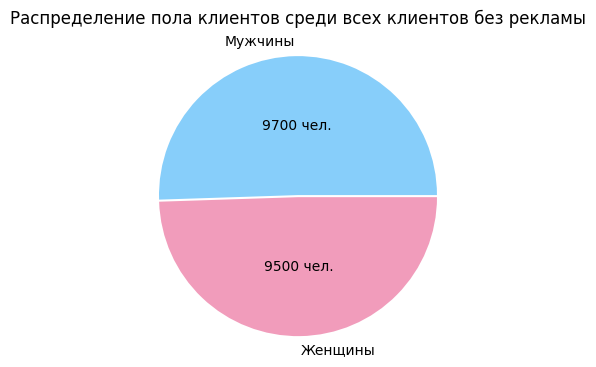

In [45]:
labels = ["Мужчины", "Женщины"]
genders = [(len(df[(df['Gender'] == 'Male') & (df['A'] != 1) & (df['B'] != 1)])), (len(df[(df['Gender'] == 'Female') & (df['A'] != 1) & (df['B'] != 1)]))]
plt.figure(figsize = (6, 4))
plt.pie(
    genders,
    labels = labels,
    explode = (0.015, 0),
    colors =  ['#87CEFA', '#F19CBB'],
    autopct = lambda x: '{:.0f} чел.'.format(x * sum(genders) / 100),
    pctdistance = 0.5
)
plt.title('Распределение пола клиентов среди всех клиентов без рекламы', pad = 13)
plt.axis('equal')
plt.show()

# мужчин больше во всех группах

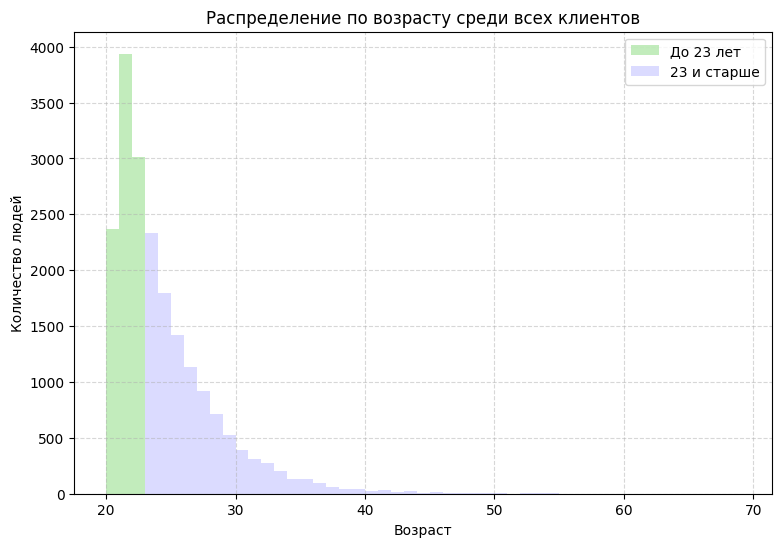

In [46]:
# вдруг понадобится
plt.figure(figsize = (9, 6))
plt.hist(df[df['Age'] < 23]['Age'], bins=range(20, 70, 1), alpha=0.7, label='До 23 лет', color='#A8E4A0')
plt.hist(df[df['Age'] >= 23]['Age'], bins=range(20, 70, 1), alpha=0.7, label='23 и старше', color='#CCCCFF')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.title('Распределение по возрасту среди всех клиентов')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5) #отображение сетки на графике
plt.show()

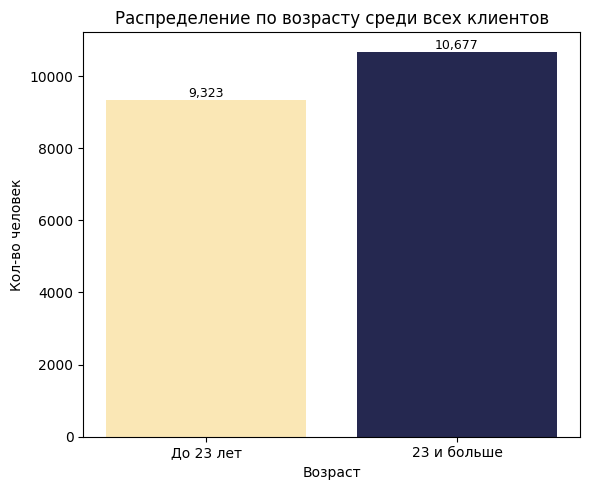

In [47]:
categories = ['До 23 лет', '23 и больше']
profits = [
    len(df[df['Age'] < 23]['Age']),
    len(df[df['Age'] >= 23]['Age'])
]
plt.figure(figsize=(6, 5))
bars = plt.bar(categories, profits, color = ['#FAE7B5', '#252850'])
plt.title('Распределение по возрасту среди всех клиентов', fontsize = 12)
plt.xlabel('Возраст', fontsize = 10)
plt.ylabel('Кол-во человек', fontsize = 10)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,.0f}',
        ha = 'center',
        va = 'bottom',
        fontsize = 9
    )
plt.tight_layout()
plt.show()

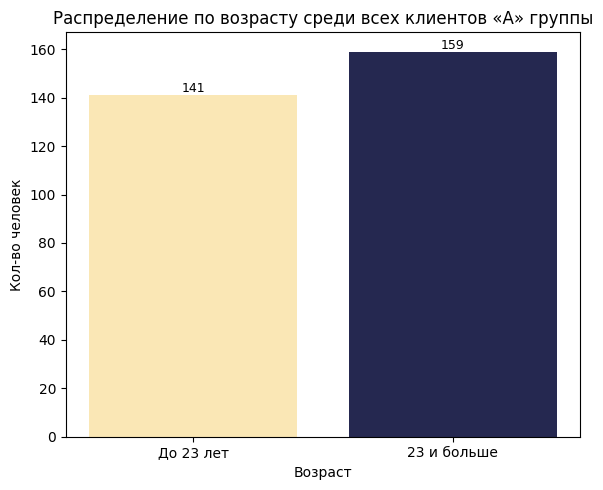

In [48]:
categories = ['До 23 лет', '23 и больше']
profits = [
    len(df[(df['Age'] < 23) & (df['A'] == 1) ]['Age']),
    len(df[(df['Age'] >= 23) & (df['A'] == 1) ]['Age'])
]
plt.figure(figsize=(6, 5))
bars = plt.bar(categories, profits, color = ['#FAE7B5', '#252850'])
plt.title('Распределение по возрасту среди всех клиентов «A» группы', fontsize = 12)
plt.xlabel('Возраст', fontsize = 10)
plt.ylabel('Кол-во человек', fontsize = 10)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,.0f}',
        ha = 'center',
        va = 'bottom',
        fontsize = 9
    )
plt.tight_layout()
plt.show()

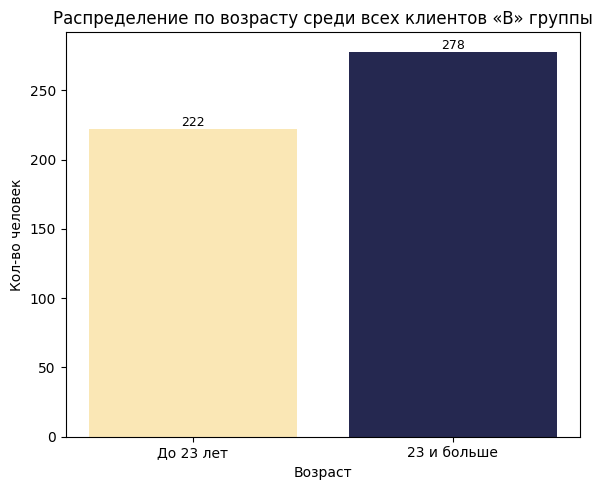

In [49]:
categories = ['До 23 лет', '23 и больше']
profits = [
    len(df[(df['Age'] < 23) & (df['B'] == 1) ]['Age']),
    len(df[(df['Age'] >= 23) & (df['B'] == 1) ]['Age'])
]
plt.figure(figsize=(6, 5))
bars = plt.bar(categories, profits, color = ['#FAE7B5', '#252850'])
plt.title('Распределение по возрасту среди всех клиентов «B» группы', fontsize = 12)
plt.xlabel('Возраст', fontsize = 10)
plt.ylabel('Кол-во человек', fontsize = 10)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,.0f}',
        ha = 'center',
        va = 'bottom',
        fontsize = 9
    )
plt.tight_layout()
plt.show()

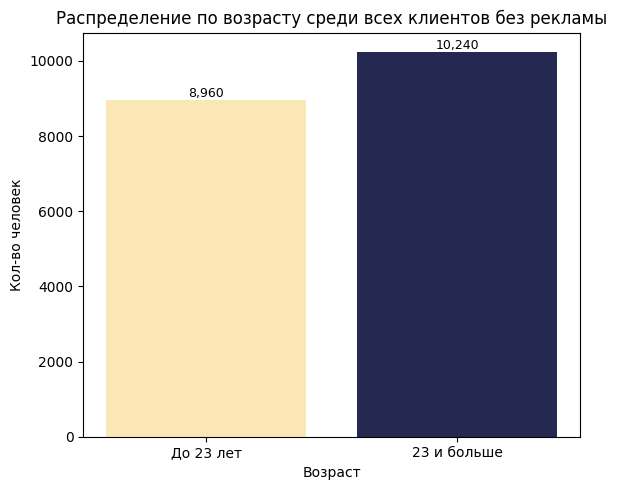

In [50]:
categories = ['До 23 лет', '23 и больше']
profits = [
    len(df[(df['Age'] < 23) & (df['A'] != 1) & (df['B'] != 1)]),
    len(df[((df['Age'] >= 23)) & (df['A'] != 1) & (df['B'] != 1)])
]
plt.figure(figsize=(6, 5))
bars = plt.bar(categories, profits, color = ['#FAE7B5', '#252850'])
plt.title('Распределение по возрасту среди всех клиентов без рекламы', fontsize = 12)
plt.xlabel('Возраст', fontsize = 10)
plt.ylabel('Кол-во человек', fontsize = 10)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,.0f}',
        ha = 'center',
        va = 'bottom',
        fontsize = 9
    )
plt.tight_layout()
plt.show()

# 23+ летних немного больше в каждой группе

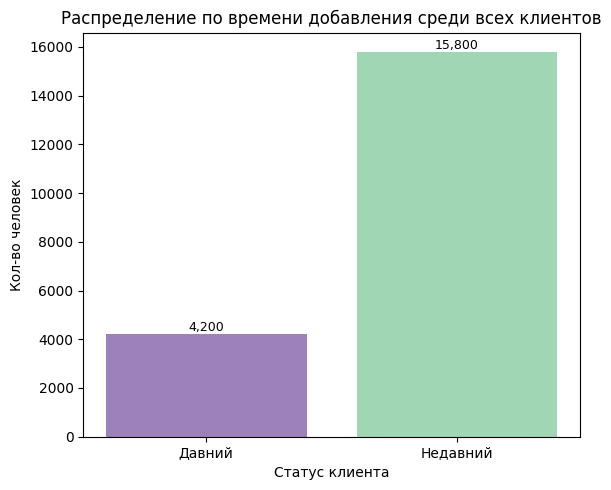

In [51]:
categories = ['Давний', 'Недавний']
profits = [
    len(df[df['ClientSince'] == 2023]['ClientSince']),
    len(df[df['ClientSince'] == 2024]['ClientSince'])
]
plt.figure(figsize=(6, 5))
bars = plt.bar(categories, profits, color = ['#9D81BA', '#A0D6B4'])
plt.title('Распределение по времени добавления среди всех клиентов', fontsize = 12)
plt.xlabel('Статус клиента', fontsize = 10)
plt.ylabel('Кол-во человек', fontsize = 10)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,.0f}',
        ha = 'center',
        va = 'bottom',
        fontsize = 9
    )
plt.tight_layout()
plt.show()

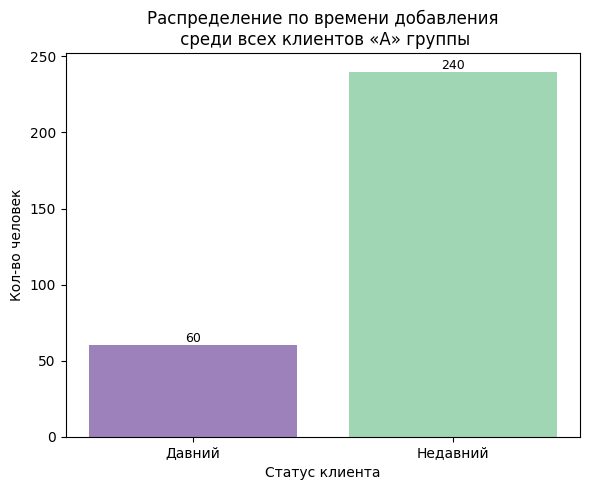

In [52]:
categories = ['Давний', 'Недавний']
profits = [
    len(df[(df['ClientSince'] == 2023) & (df['A'] == 1)]['ClientSince']),
    len(df[(df['ClientSince'] == 2024) & (df['A'] == 1)]['ClientSince'])
]
plt.figure(figsize=(6, 5))
bars = plt.bar(categories, profits, color = ['#9D81BA', '#A0D6B4'])
plt.title('Распределение по времени добавления\n среди всех клиентов «A» группы', fontsize = 12)
plt.xlabel('Статус клиента', fontsize = 10)
plt.ylabel('Кол-во человек', fontsize = 10)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,.0f}',
        ha = 'center',
        va = 'bottom',
        fontsize = 9
    )
plt.tight_layout()
plt.show()

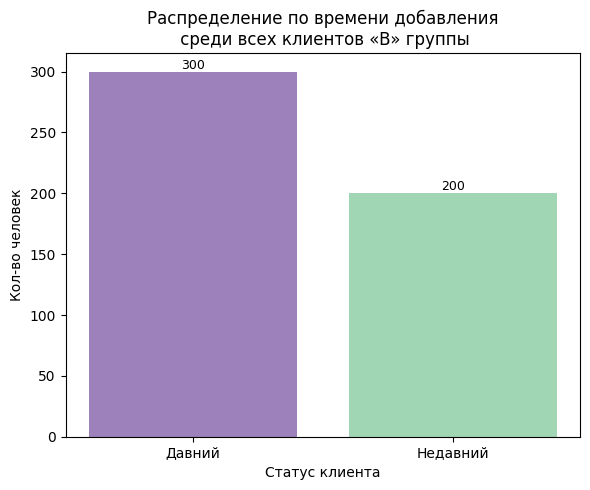

In [53]:
categories = ['Давний', 'Недавний']
profits = [
    len(df[(df['ClientSince'] == 2023) & (df['B'] == 1)]['ClientSince']),
    len(df[(df['ClientSince'] == 2024) & (df['B'] == 1)]['ClientSince'])
]
plt.figure(figsize=(6, 5))
bars = plt.bar(categories, profits, color = ['#9D81BA', '#A0D6B4'])
plt.title('Распределение по времени добавления\n среди всех клиентов «B» группы', fontsize = 12)
plt.xlabel('Статус клиента', fontsize = 10)
plt.ylabel('Кол-во человек', fontsize = 10)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,.0f}',
        ha = 'center',
        va = 'bottom',
        fontsize = 9
    )
plt.tight_layout()
plt.show()

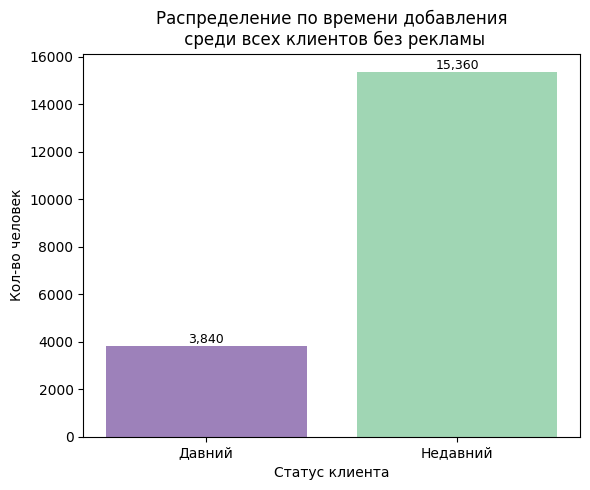

In [54]:
categories = ['Давний', 'Недавний']
profits = [
    len(df[(df['ClientSince'] == 2023) & (df['A'] != 1) & (df['B'] != 1)]['ClientSince']),
    len(df[(df['ClientSince'] == 2024) & (df['A'] != 1) & (df['B'] != 1)]['ClientSince'])
]
plt.figure(figsize=(6, 5))
bars = plt.bar(categories, profits, color = ['#9D81BA', '#A0D6B4'])
plt.title('Распределение по времени добавления\n среди всех клиентов без рекламы', fontsize = 12)
plt.xlabel('Статус клиента', fontsize = 10)
plt.ylabel('Кол-во человек', fontsize = 10)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,.0f}',
        ha = 'center',
        va = 'bottom',
        fontsize = 9
    )
plt.tight_layout()
plt.show()

# Вывод по результатам эксперимента
**Прогноз прибыли для кампании B сомнителен** , поскольку параметры участников (время добавления) не совсем соответствуют характеристикам общей группы. В отличие от кампании A, где экспериментальные группы более репрезентативны, результаты кампании B могут быть смещены демографическими различиями, что снижает точность прогнозов.
## Репрезентативность выборки
Обеспечение схожести параметров участников в экспериментальных группах с общей группой важно для того, чтобы результаты эксперимента можно было обобщить на всю популяцию без влияния демографических различий, что повышает надежность и валидность исследования.

20.0 8.75 4.0 10.5
20.0 2.994791666666667


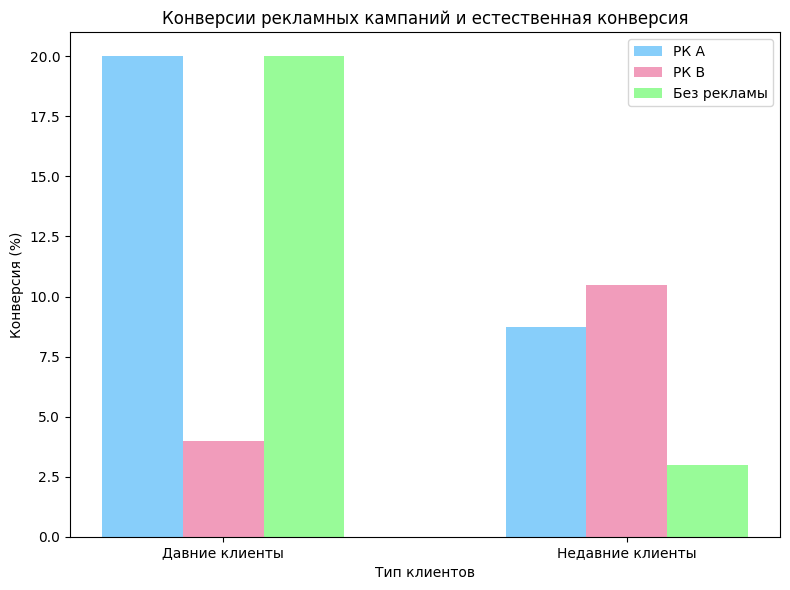

In [55]:
# Black
old_clients = df[df['ClientSince'] == 2023]
new_clients = df[df['ClientSince'] == 2024]

old_A_buyers = len(old_clients[(old_clients['A'] == 1) & (old_clients['Purchased'] == 1)])
new_A_buyers = len(new_clients[(new_clients['A'] == 1) & (new_clients['Purchased'] == 1)])
conversion_A_old = old_A_buyers / len(old_clients[old_clients['A'] == 1]) * 100
conversion_A_new = new_A_buyers / len(new_clients[new_clients['A'] == 1]) * 100

old_B_buyers = len(old_clients[(old_clients['B'] == 1) & (old_clients['Purchased'] == 1)])
new_B_buyers = len(new_clients[(new_clients['B'] == 1) & (new_clients['Purchased'] == 1)])
conversion_B_old = old_A_buyers / len(old_clients[old_clients['B'] == 1]) * 100
conversion_B_new = new_A_buyers / len(new_clients[new_clients['B'] == 1]) * 100

print(conversion_A_old, conversion_A_new, conversion_B_old, conversion_B_new)

old_no_ad_buyers = len(old_clients[(old_clients['A'] != 1) & (old_clients['B'] != 1) & (old_clients['Purchased'] == 1)])
new_no_ad_buyers = len(new_clients[(new_clients['A'] != 1) & (new_clients['B'] != 1) & (new_clients['Purchased'] == 1)])
conversion_no_ad_old = old_no_ad_buyers / (len(old_clients[(old_clients['A'] != 1) & (old_clients['B'] != 1)])) * 100
conversion_no_ad_new = new_no_ad_buyers / (len(new_clients[(new_clients['A'] != 1) & (new_clients['B'] != 1)])) * 100

print(conversion_no_ad_old, conversion_no_ad_new)
# Конверсия от рекламы А (старым пользователям) такая же как и конверсия без рекламы (старым пользователем)

labels = ['Давние клиенты', 'Недавние клиенты']
A_conversions = [conversion_A_old, conversion_A_new]
B_conversions = [conversion_B_old, conversion_B_new]
No_ad_conversions = [conversion_no_ad_old, conversion_no_ad_new]

fig, ax = plt.subplots(figsize=(8, 6))
width = 0.2

x = range(len(labels))
ax.bar(x, A_conversions, width, label='РК A', color='#87CEFA')
ax.bar([p + width for p in x], B_conversions, width, label='РК B', color='#F19CBB')
ax.bar([p + width * 2 for p in x], No_ad_conversions, width, label='Без рекламы', color='#98FB98')

# Подписи и легенда
ax.set_xlabel('Тип клиентов')
ax.set_ylabel('Конверсия (%)')
ax.set_title('Конверсии рекламных кампаний и естественная конверсия')
ax.set_xticks([p + width for p in x])  # Центрируем метки по оси X
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


# Вывод: из графика видно, что разницы между "А" группой и "без рекламы" среди давних клиентов нет -> рекламу лучше не запускать
# Среди недавних выигрывает кампания "В" -> нужно покупать рекламу у неё

20.0 11.818181818181818
4.477611940298507 12.380952380952381
9.817708333333334 1.5234375


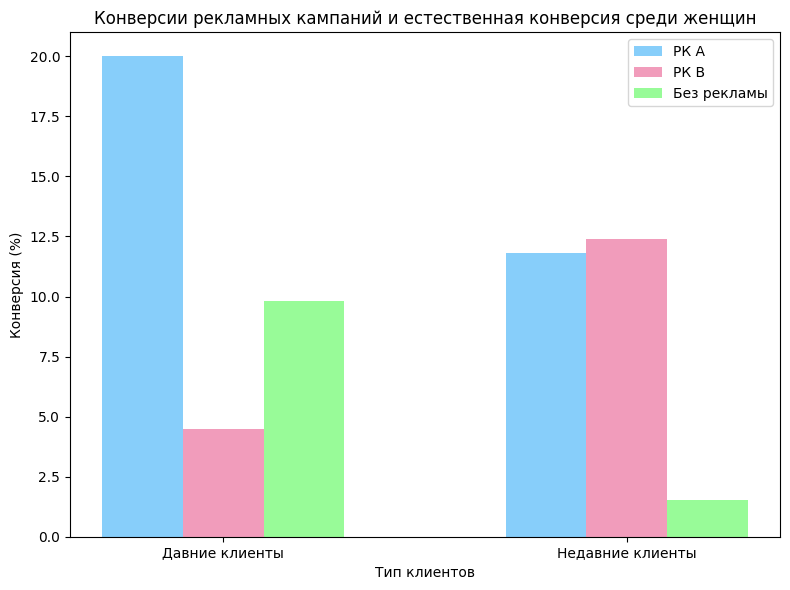

In [56]:
old_A_buyers_women = len(old_clients[(old_clients['A'] == 1) & (old_clients['Purchased'] == 1) & (old_clients['Gender'] == 'Female')])
new_A_buyers_women = len(new_clients[(new_clients['A'] == 1) & (new_clients['Purchased'] == 1) & (new_clients['Gender'] == 'Female')])
conversion_A_old_women = old_A_buyers_women / (len(old_clients[(old_clients['A'] == 1) & (old_clients['Gender'] == 'Female')])) * 100
conversion_A_new_women = new_A_buyers_women / (len(new_clients[(new_clients['A'] == 1) & (new_clients['Gender'] == 'Female')])) * 100

old_B_buyers_women = len(old_clients[(old_clients['A'] == 1) & (old_clients['Purchased'] == 1) & (old_clients['Gender'] == 'Female')])
new_B_buyers_women = len(new_clients[(new_clients['A'] == 1) & (new_clients['Purchased'] == 1) & (new_clients['Gender'] == 'Female')])
conversion_B_old_women = old_B_buyers_women / (len(old_clients[(old_clients['B'] == 1) & (old_clients['Gender'] == 'Female')])) * 100
conversion_B_new_women = new_B_buyers_women / (len(new_clients[(new_clients['B'] == 1) & (new_clients['Gender'] == 'Female')])) * 100

old_no_ad_buyers_women = len(old_clients[(old_clients['A'] != 1) & (old_clients['B'] != 1) & (old_clients['Purchased'] == 1) & (old_clients['Gender'] == 'Female')])
new_no_ad_buyers_women = len(new_clients[(new_clients['A'] != 1) & (new_clients['B'] != 1) & (new_clients['Purchased'] == 1) & (new_clients['Gender'] == 'Female')])
conversion_no_ad_old_women = old_no_ad_buyers_women / (len(old_clients[(old_clients['A'] != 1) & (old_clients['B'] != 1)])) * 100
conversion_no_ad_new_women = new_no_ad_buyers_women / (len(new_clients[(new_clients['A'] != 1) & (new_clients['B'] != 1)])) * 100

print(conversion_A_old_women, conversion_A_new_women)
print(conversion_B_old_women, conversion_B_new_women)
print(conversion_no_ad_old_women, conversion_no_ad_new_women)

labels = ['Давние клиенты', 'Недавние клиенты']
A_conversions_w = [conversion_A_old_women, conversion_A_new_women]
B_conversions_w = [conversion_B_old_women, conversion_B_new_women]
No_ad_conversions_w = [conversion_no_ad_old_women, conversion_no_ad_new_women]

fig, ax = plt.subplots(figsize=(8, 6))
width = 0.2

x = range(len(labels))
ax.bar(x, A_conversions_w, width, label='РК A', color='#87CEFA')
ax.bar([p + width for p in x], B_conversions_w, width, label='РК B', color='#F19CBB')
ax.bar([p + width * 2 for p in x], No_ad_conversions_w, width, label='Без рекламы', color='#98FB98')

ax.set_xlabel('Тип клиентов')
ax.set_ylabel('Конверсия (%)')
ax.set_title('Конверсии рекламных кампаний и естественная конверсия среди женщин')
ax.set_xticks([p + width for p in x])  # Центрируем метки по оси X
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# на давних женщин очень хорошо влияет кампания "А", на недавних чуть-чуть лучше кампания "Б" -> выгоднее воспользоваться "А"

20.0 6.153846153846154
21.084337349397593 2.1052631578947367
19.81753674607197 2.9248091109097967


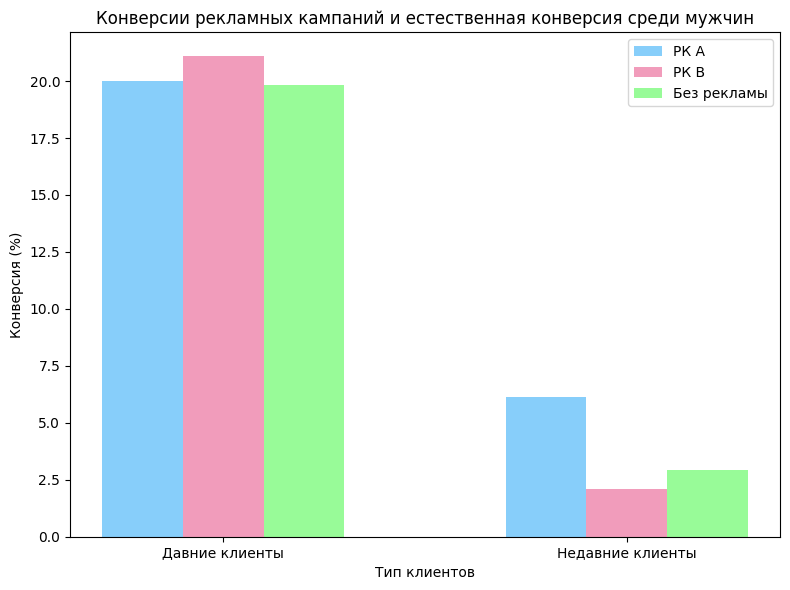

In [57]:
old_A_buyers_men = len(old_clients[(old_clients['A'] == 1) & (old_clients['Purchased'] == 1) & (old_clients['Gender'] == 'Male')])
new_A_buyers_men = len(new_clients[(new_clients['A'] == 1) & (new_clients['Purchased'] == 1) & (new_clients['Gender'] == 'Male')])
conversion_A_old_men = old_A_buyers_men / (len(old_clients[(old_clients['A'] == 1) & (old_clients['Gender'] == 'Male')])) * 100
conversion_A_new_men = new_A_buyers_men / (len(new_clients[(new_clients['A'] == 1) & (new_clients['Gender'] == 'Male')])) * 100

old_B_buyers_men = len(old_clients[(old_clients['B'] == 1) & (old_clients['Purchased'] == 1) & (old_clients['Gender'] == 'Male')])
new_B_buyers_men = len(new_clients[(new_clients['B'] == 1) & (new_clients['Purchased'] == 1) & (new_clients['Gender'] == 'Male')])
conversion_B_old_men = old_B_buyers_men / (len(old_clients[(old_clients['B'] == 1) & (old_clients['Gender'] == 'Male')])) * 100
conversion_B_new_men = new_B_buyers_men / (len(new_clients[(new_clients['B'] == 1) & (new_clients['Gender'] == 'Male')])) * 100

old_no_ad_buyers_men = len(old_clients[(old_clients['A'] != 1) & (old_clients['B'] != 1) & (old_clients['Purchased'] == 1) & (old_clients['Gender'] == 'Male')])
new_no_ad_buyers_men = len(new_clients[(new_clients['A'] != 1) & (new_clients['B'] != 1) & (new_clients['Purchased'] == 1) & (new_clients['Gender'] == 'Male')])
conversion_no_ad_old_men = old_no_ad_buyers_men / (len(old_clients[(old_clients['A'] != 1) & (old_clients['B'] != 1) & (old_clients['Gender'] == 'Male')])) * 100
conversion_no_ad_new_men = new_no_ad_buyers_men / (len(new_clients[(new_clients['A'] != 1) & (new_clients['B'] != 1) & (new_clients['Gender'] == 'Male')])) * 100

print(conversion_A_old_men, conversion_A_new_men)
print(conversion_B_old_men, conversion_B_new_men)
print(conversion_no_ad_old_men, conversion_no_ad_new_men)

labels = ['Давние клиенты', 'Недавние клиенты']
A_conversions_m = [conversion_A_old_men, conversion_A_new_men]
B_conversions_m = [conversion_B_old_men, conversion_B_new_men]
No_ad_conversions_m = [conversion_no_ad_old_men, conversion_no_ad_new_men]


fig, ax = plt.subplots(figsize=(8, 6))
width = 0.2

x = range(len(labels))
ax.bar(x, A_conversions_m, width, label='РК A', color='#87CEFA')
ax.bar([p + width for p in x], B_conversions_m, width, label='РК B', color='#F19CBB')
ax.bar([p + width * 2 for p in x], No_ad_conversions_m, width, label='Без рекламы', color='#98FB98')

ax.set_xlabel('Тип клиентов')
ax.set_ylabel('Конверсия (%)')
ax.set_title('Конверсии рекламных кампаний и естественная конверсия среди мужчин')
ax.set_xticks([p + width for p in x])  # Центрируем метки по оси X
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# давние клиенты мужчины не особо падкие на рекламу вообще...реклама помогает лишь немного в обеих группах (давние/недавние)

# Необходимо проанализировать следующие группы:

- **Давние клиенты:**
  - Женщины до 23 лет
  - Женщины после 23 лет
  - Мужчины до 23 лет
  - Мужчины после 23 лет

- **Недавние клиенты:**
  - Женщины до 23 лет
  - Женщины после 23 лет
  - Мужчины до 23 лет
  - Мужчины после 23 лет



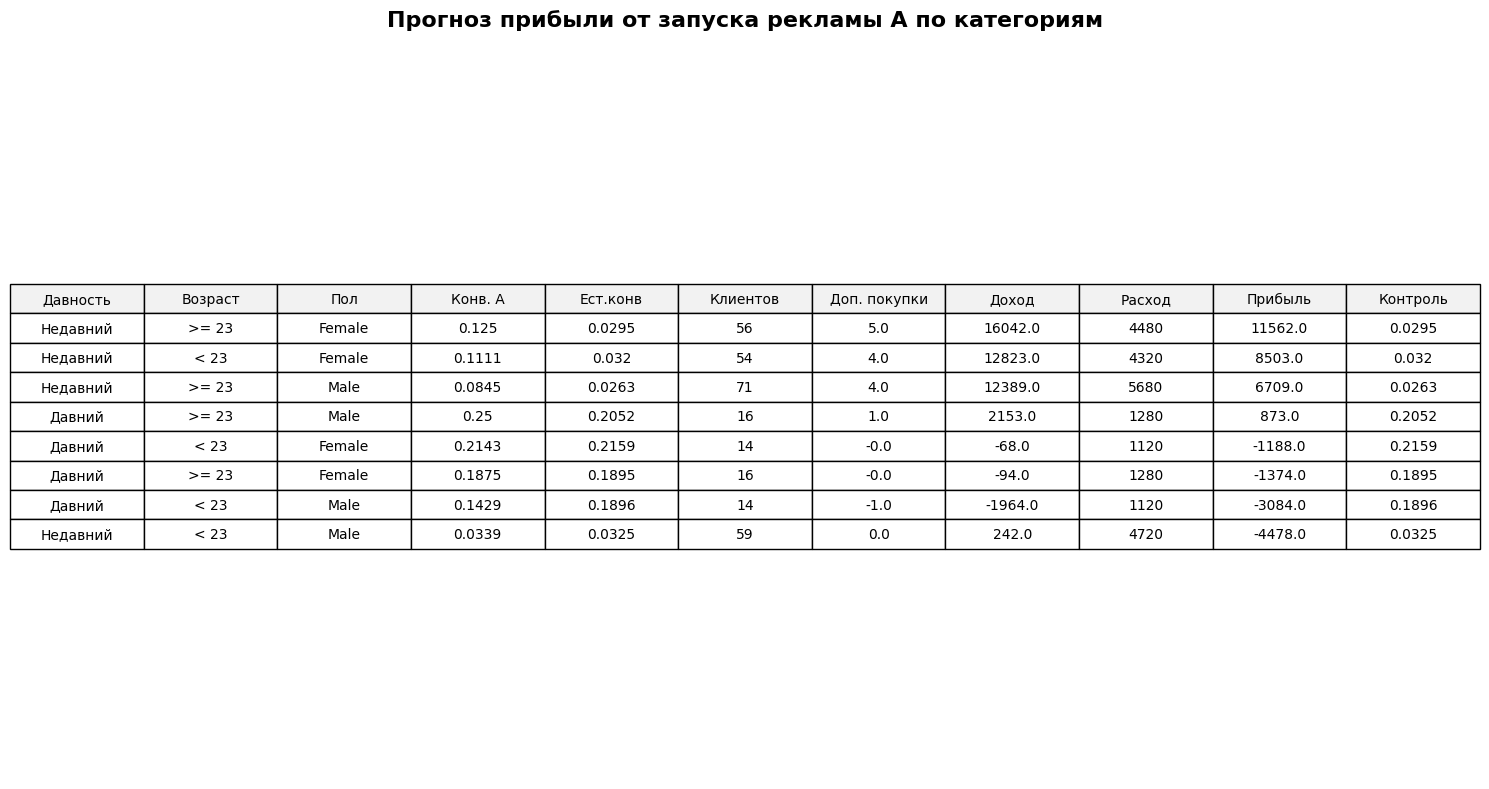

In [76]:
df['ClientCategory'] = df['ClientSince'].apply(lambda x: 'Недавний' if x == 2024 else 'Давний')
df['AgeCategory'] = df['Age'].apply(lambda x: '< 23' if x < 23 else '>= 23')

control_group = df[df['A'].isna() & df['B'].isna()]
test_group_A = df[df['A'] == 1]

def category_analysis(control, test):
    control_grouped = control.groupby(['ClientCategory', 'AgeCategory', 'Gender'])['Purchased'].apply(lambda x: x.fillna(0).mean()).reset_index(name='ControlConversion') #средняя конверсия
    test_grouped = test.groupby(['ClientCategory', 'AgeCategory', 'Gender'])['Purchased'] \
        .apply(lambda x: x.fillna(0).mean()).reset_index(name='TestConversion')

    merged = pd.merge(test_grouped, control_grouped, on=['ClientCategory', 'AgeCategory', 'Gender'], how='left')

    test_counts = test.groupby(['ClientCategory', 'AgeCategory', 'Gender']).size().reset_index(name='TestClients')
    merged = pd.merge(merged, test_counts, on=['ClientCategory', 'AgeCategory', 'Gender'])

    merged['AdditionalConversions'] = (merged['TestConversion'] - merged['ControlConversion']) * merged['TestClients']
    merged['Income'] = merged['AdditionalConversions'] * 3000
    merged['Cost'] = merged['TestClients'] * 80
    merged['Profit'] = merged['Income'] - merged['Cost']

    return merged

results = category_analysis(control_group, test_group_A)

results[['TestConversion', 'ControlConversion']] = results[['TestConversion', 'ControlConversion']].round(4)
results[['AdditionalConversions', 'Income', 'Cost', 'Profit']] = results[['AdditionalConversions', 'Income', 'Cost', 'Profit']].round(0)

results = results.sort_values('Profit', ascending=False)

table_fig = results.copy()
table_fig = table_fig[['ClientCategory', 'AgeCategory', 'Gender', 'TestConversion',
                       'ControlConversion', 'TestClients', 'AdditionalConversions',
                       'Income', 'Cost', 'Profit']]

table_fig.columns = ['Давность', 'Возраст', 'Пол', 'Конв. A', 'Ест.конв', 'Клиентов',
                     'Доп. покупки', 'Доход', 'Расход', 'Прибыль']

table_fig[['Конв. A', 'Контроль']] = table_fig[['Конв. A', 'Ест.конв']].round(4)
table_fig[['Доп. покупки', 'Доход', 'Расход', 'Прибыль']] = table_fig[['Доп. покупки', 'Доход', 'Расход', 'Прибыль']].round(0)

fig, ax = plt.subplots(figsize=(15, 4 + 0.5 * len(table_fig)))
ax.axis('off')

table = ax.table(cellText=table_fig.values,
                 colLabels=table_fig.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=["#f2f2f2"] * table_fig.shape[1])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.title("Прогноз прибыли от запуска рекламы A по категориям", fontsize=16, weight='bold', pad=20)
plt.tight_layout()
plt.show()


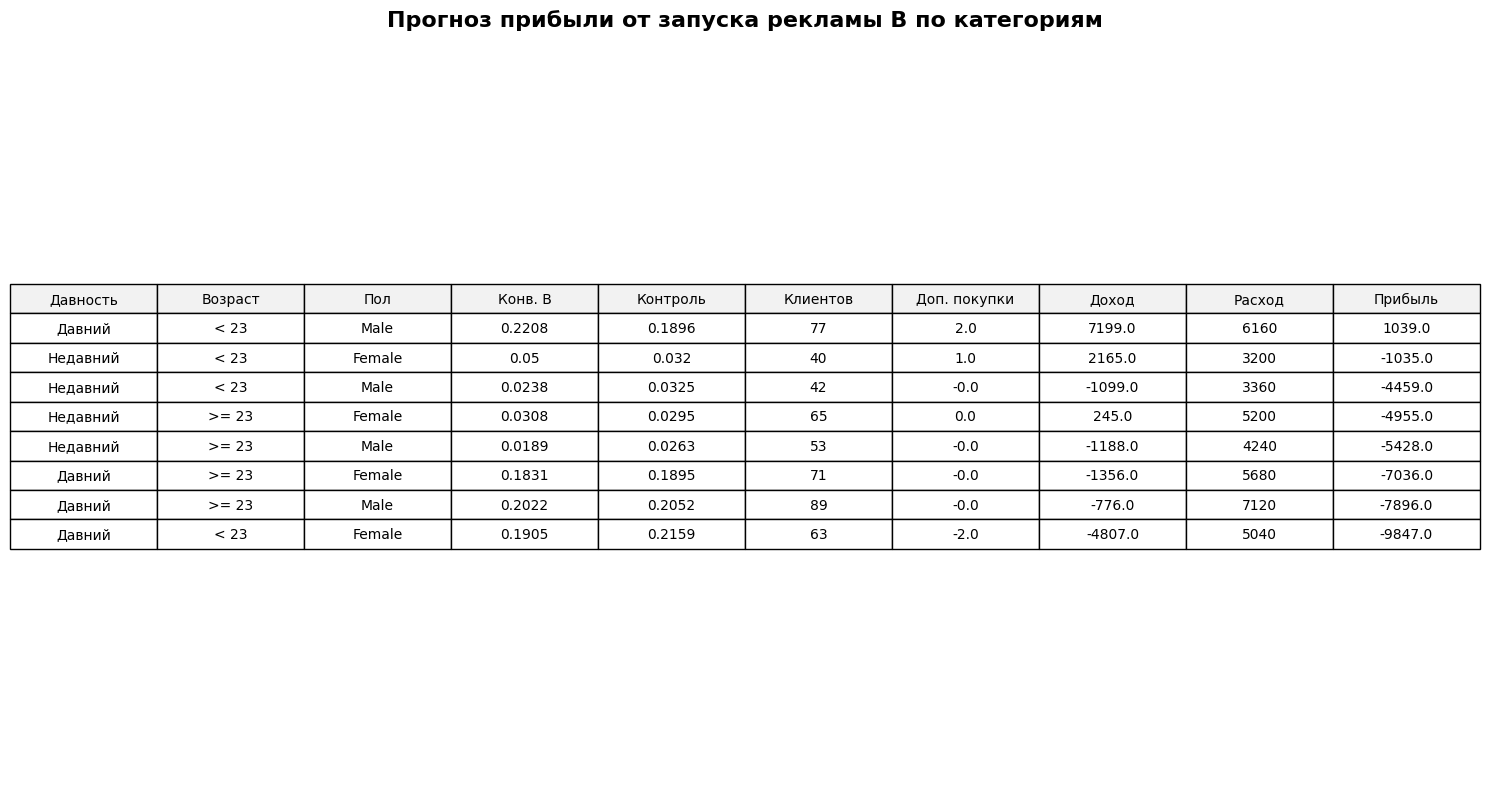

In [78]:
test_group_B = df[df['B'] == 1]
results = category_analysis(control_group, test_group_B)

results[['TestConversion', 'ControlConversion']] = results[['TestConversion', 'ControlConversion']].round(4)
results[['AdditionalConversions', 'Income', 'Cost', 'Profit']] = results[['AdditionalConversions', 'Income', 'Cost', 'Profit']].round(0)

results = results.sort_values('Profit', ascending=False)

table_fig = results.copy()
table_fig = table_fig[['ClientCategory', 'AgeCategory', 'Gender', 'TestConversion',
                       'ControlConversion', 'TestClients', 'AdditionalConversions',
                       'Income', 'Cost', 'Profit']]

table_fig.columns = ['Давность', 'Возраст', 'Пол', 'Конв. B', 'Контроль', 'Клиентов',
                     'Доп. покупки', 'Доход', 'Расход', 'Прибыль']

table_fig[['Конв. B', 'Контроль']] = table_fig[['Конв. B', 'Контроль']].round(4)
table_fig[['Доп. покупки', 'Доход', 'Расход', 'Прибыль']] = table_fig[['Доп. покупки', 'Доход', 'Расход', 'Прибыль']].round(0)

fig, ax = plt.subplots(figsize=(15, 4 + 0.5 * len(table_fig)))
ax.axis('off')

table = ax.table(cellText=table_fig.values,
                 colLabels=table_fig.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=["#f2f2f2"] * table_fig.shape[1])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.title("Прогноз прибыли от запуска рекламы B по категориям", fontsize=16, weight='bold', pad=20)
plt.tight_layout()
plt.show()
